<a href="https://colab.research.google.com/github/Matthew-Likhachev/Fuzzy-Logic/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 14.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6fb47600589d2d853e7753af6864f4d0523e454626bfb652fbdf625c2dd18c0a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
# B - количество русскоязычных статей по теме, T=(«мало», «достаточно», «много»), X=[1,5] (количество статей от 1 до 5), G=(«очень мало», «достаточно или много»),
# M – увеличение на единицу степени принадлежность нечеткой переменной «много», операция объединения нечетких множеств;

# B - количество англоязычных статей по теме, T=(«мало», «достаточно», «много»), X=[1,5] (количество статей от 1 до 5), G=(«очень мало», «достаточно или много»),
# M – увеличение на единицу степени принадлежность нечеткой переменной «много», операция объединения нечетких множеств;

# B - количество комментариев по отношению к цитированию, T=(«мало», «достаточно», «много»), X=[0,1] (процентное соотношение комментариев к цитированию), G=(«очень мало», «достаточно или много»),
# M – увеличение на единицу степени принадлежность нечеткой переменной «много», операция объединения нечетких множеств;

#Удачный обзор литературы - T =("достаточный", "Недостаточный") x = [0,1] (в процентах насколько удачная), G=("достаточный", "Недостаточный")

#Задача - вычилслить является ли данный обзор литературы по методам ИИ достаточным, чтобы можно было поставить по нему "зачтено".
#На вход подаются 3 параметра - кол-во используемых русскоязычных статей, кол-во используемых англоязычных статей, и процент личных выводов/комментариев к общему числу цитирований

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - "Написание обзора литературы" (кол-во русск статей, кол-во англ статей, комменты/цитирование)
ru_papers = ctrl.Antecedent(np.arange(0, 6, 1), 'ru_papers')#создаем входные данные кол-ва русской литературы (от 0 штук до 5 с шагом 1)
eng_papers = ctrl.Antecedent(np.arange(0, 6, 1), 'eng_papers')#создаем входные данные кол-ва английской литературы (от 0 штук до 5 с шагом 1)
comment_quote = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'comment_quote')#создаем входные данные процент уникальности текста (от 0.0 проц до 1.0 с шагом 0.1)
result = ctrl.Consequent(np.arange(0.0, 1.1, 0.1), "Result")#создаем выходные данные процент вероятности зачтено или нет (от 0.0 проц до 1.0 с шагом 0.1)


# используем стандартную функцию принадлежности (треугольник)
result.automf(names=['not_enough', 'enough'])


#заполняем информацию для графиков. С какого момента какой параметр вступает в силу и доходит до значения влияния 1 и 0
ru_papers['small'] = fuzz.trapmf(ru_papers.universe, [0, 0, 1, 2])
ru_papers['enough'] = fuzz.trapmf(ru_papers.universe, [1, 3, 3, 5])
ru_papers['many'] = fuzz.trapmf(ru_papers.universe, [3, 4, 5, 5])

eng_papers['small'] = fuzz.trapmf(eng_papers.universe, [0, 0, 1, 2])
eng_papers['enough'] = fuzz.trapmf(eng_papers.universe,[1, 3, 3, 5])
eng_papers['many'] = fuzz.trapmf(eng_papers.universe,[3, 4, 5, 5])

comment_quote['small'] = fuzz.trapmf(comment_quote.universe, [0.0, 0.0, 0.7, 0.8])
comment_quote['enough'] = fuzz.trapmf(comment_quote.universe, [0.7, 0.8, 0.8, 0.9])
comment_quote['alot'] = fuzz.trapmf(comment_quote.universe, [0.8, 0.9, 1.0, 1.0])

result['not_enough'] = fuzz.trapmf(result.universe, [0.0, 0.0, 0.4, 0.6])
result['enough'] = fuzz.trapmf(result.universe, [0.4, 0.6, 1.0, 1.0])

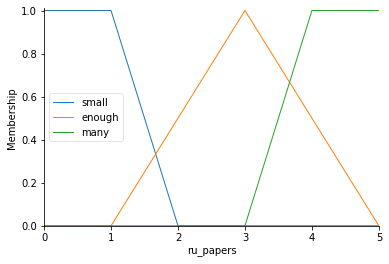

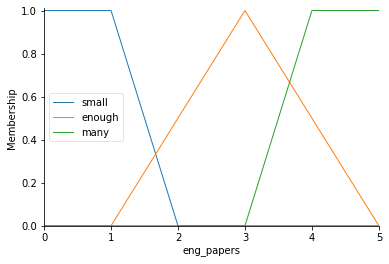

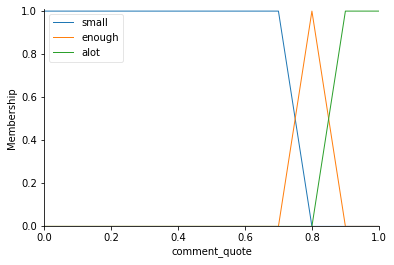

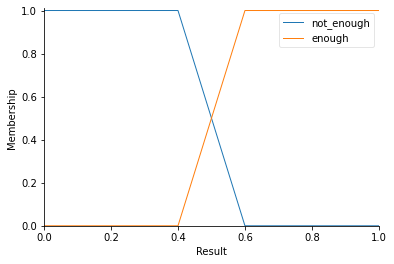

In [ ]:
#показываем полученные графики
ru_papers.view()
eng_papers.view()
comment_quote.view()
result.view()

In [ ]:
# ru_papers     ['small']['enough']['many']
# eng_papers    ['small']['enough']['many']
# comment_quote ['small']['enough']['alot']
#result         ['not_enough'] ['enough']

# база правил
#Создаем правила по заданным в начале условиям. Между отдельными правилами стоят логические &, если надо по заданию определить сложное правило - ставим логическое |
rule1 = ctrl.Rule(ru_papers['small'] & eng_papers['small'] & comment_quote['small'],result['not_enough'])
rule2 = ctrl.Rule(ru_papers['small']& eng_papers['small']& (comment_quote['enough']|comment_quote['alot'] ),result['not_enough'])
rule3 = ctrl.Rule(ru_papers['small']& (eng_papers['enough']|eng_papers['many'])&  comment_quote['small'], result['not_enough'])
rule4 = ctrl.Rule(ru_papers['small']&(eng_papers['enough'] | eng_papers['many'])&(comment_quote['enough']|comment_quote['alot'] ),result['not_enough'])

rule5 = ctrl.Rule((ru_papers['enough']|ru_papers['many'])& eng_papers['many']& comment_quote['small'],result['not_enough'])
rule6 = ctrl.Rule((ru_papers['enough']|ru_papers['many'])& eng_papers['small']& (comment_quote['enough']|comment_quote['alot'] ),result['not_enough'])
rule7 = ctrl.Rule((ru_papers['enough']|ru_papers['many'])& (eng_papers['enough'] | eng_papers['many'])&  comment_quote['small'], result['not_enough'])
rule8 = ctrl.Rule((ru_papers['enough']|ru_papers['many'])&(eng_papers['enough'] | eng_papers['many'])&(comment_quote['enough']|comment_quote['alot'] ),result['enough'])


In [ ]:
#загружаем правила
result_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
result_simulator= ctrl.ControlSystemSimulation(result_ctrl)

#вводим тестовые данные для предсказания
result_simulator.input['ru_papers'] = 3
result_simulator.input['eng_papers'] = 2
result_simulator.input['comment_quote'] = 0.7
#выполняем предсказание
result_simulator.compute()
print(result_simulator.output['Result'])

0.2757575757575767


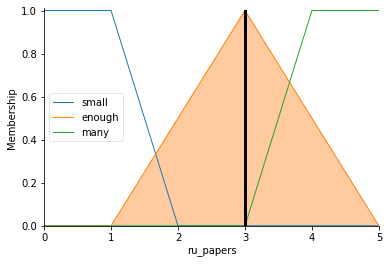

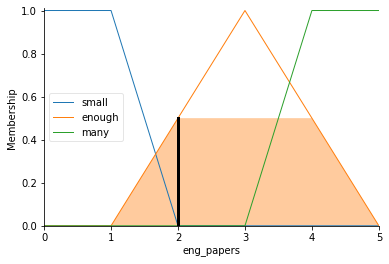

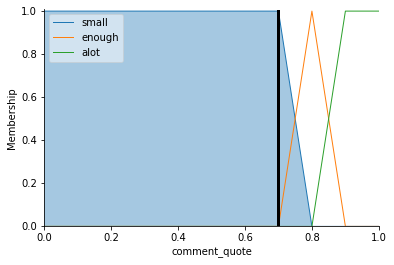

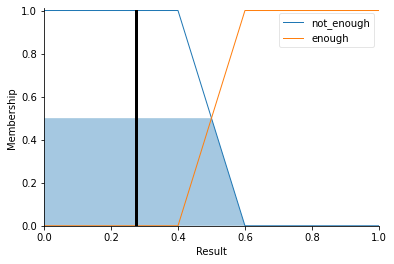

In [ ]:
#показываем по каждому параметру, как он влияет на результат и к какой области отностся введенный параметр
ru_papers.view(sim=result_simulator)
eng_papers.view(sim=result_simulator)
comment_quote.view(sim=result_simulator)
result.view(sim=result_simulator)